In this report, we are going to make wordcloud plots for the philosophy dataset and explore the patterns of words for different philosophers from the same school and for books written by the same philosopher.

## Data Import and Cleaning

Data quality is the most important part when preparing the data. Firstly, we will check if there is any missing value and duplicated value in the data as well as exploring the types of each column.

In [1]:
import pandas as pd
import plotly.express as px
import sys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import HTML

In [2]:
df = pd.read_csv("philosophy_data.csv")

df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

In [3]:
print("\n" + "Info:".center(100, "="))
display(df.info())

print("\n" + "Describe:".center(100, "="))
display(df.describe())

print("\n" + "Shape:".center(100, "="))
print(df.shape)

print("\n" + "Null:".center(100, "="))
display(df.isnull().sum())

print("\n" + "Duplicated:".center(100, "="))
print(df.duplicated().sum())


===============================================Info:================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


None


=============================================Describe:==============================================


original_publication_date  corpus_edition_date  sentence_length
count              360808.000000        360808.000000    360808.000000
mean                 1326.800908          1995.155642       150.790964
std                   951.492193            23.002287       104.822072
min                  -350.000000          1887.000000        20.000000
25%                  1641.000000          1991.000000        75.000000
50%                  1817.000000          2001.000000       127.000000
75%                  1949.000000          2007.000000       199.000000
max                  1985.000000          2016.000000      2649.000000


===============================================Shape:===============================================
(360808, 11)

===============================================Null:================================================


title                        0
author                       0
school                       0
sentence_spacy               0
sentence_str                 0
original_publication_date    0
corpus_edition_date          0
sentence_length              0
sentence_lowered             0
tokenized_txt                0
lemmatized_str               0
dtype: int64


============================================Duplicated:=============================================
0


As it is shown above, there is no missing data or duplicated data in the dataset. There are 360808 records and 11 entries in total. 

## Exploratory Data Aanlysis

First, take a look at the original dates of the authors to publish their books and the emerge year of each school.

In [4]:
pd.DataFrame( df.groupby(by=['school','author','title', 'original_publication_date'])['sentence_str'].count()).sort_values('original_publication_date', ascending = True)

sentence_str
school          author          title                                              original_publication_date              
plato           Plato           Plato - Complete Works                             -350                              38366
aristotle       Aristotle       Aristotle - Complete Works                         -320                              48779
stoicism        Epictetus       Enchiridion                                         125                                323
                Marcus Aurelius Meditations                                         170                               2212
rationalism     Descartes       Discourse On Method                                 1637                               340
                                Meditations On First Philosophy                     1641                               792
                Malebranche     The Search After Truth                              1674                             12997
                Spinoza         On The Improvement Of Understanding                 1677                               489
                                Ethics                                              1677                              3304
empiricism      Locke           Essay Concerning Human Understanding                1689                              7742
                                Second Treatise On Government                       1689                              1143
rationalism     Leibniz         Theodicy                                            1710                              5027
empiricism      Berkeley        A Treatise Concerning The Principles Of Human K...  1710                              1040
                                Three Dialogues                                     1713                              1694
                Hume            A Treatise Of Human Nature                          1739                              7047
capitalism      Smith           The Wealth Of Nations                               1776                             11693
empiricism      Hume            Dialogues Concerning Natural Religion               1779                              1265
german_idealism Kant            Critique Of Pure Reason                             1781                              7472
                                Critique Of Practical Reason                        1788                              2452
                                Critique Of Judgement                               1790                              4204
feminism        Wollstonecraft  Vindication Of The Rights Of Woman                  1792                              2559
german_idealism Fichte          The System Of Ethics                                1798                              5308
                Hegel           The Phenomenology Of Spirit                         1807                              7099
capitalism      Ricardo         On The Principles Of Political Economy And Taxa...  1817                              3090
german_idealism Hegel           Science Of Logic                                    1817                             10678
                                Elements Of The Philosophy Of Right                 1820                              4923
communism       Marx            The Communist Manifesto                             1848                               493
                Lenin           Essential Works Of Lenin                            1862                              4469
                Marx            Capital                                             1883                             12996
nietzsche       Nietzsche       Beyond Good And Evil                                1886                              1906
                                Thus Spake Zarathustra                              1887                              5916
                                The Antichrist     

We can see Plato and Aristotle published their books before the Christ. 

Now, we are curious about how many authors are there in each school and who many books did each author write.

In [5]:
df1 = df.groupby(["school", "author", "original_publication_date"])["title"].count().reset_index()

df1_summary = df1.groupby(["school"])["author"].count().reset_index()

fig = px.histogram(df1_summary, y='author', x='school',
                   title="Number of authors in each school")
fig.show()

We can see the specific authors in each school from the table below:

In [6]:
pd.DataFrame( df.groupby(by=['school','author','title', 'original_publication_date'])['sentence_str'].count()).sort_values('school', ascending = True)

sentence_str
school          author          title                                              original_publication_date              
analytic        Kripke          Naming And Necessity                                1972                              2681
                                Philosophical Troubles                              1975                              9798
                Lewis           Lewis - Papers                                      1985                             13120
                Moore           Philosophical Studies                               1910                              3668
                Popper          The Logic Of Scientific Discovery                   1959                              4678
                Quine           Quintessence                                        1950                              7373
                Russell         The Analysis Of Mind                                1921                              3513
                                The Problems Of Philosophy                          1912                              1560
                Wittgenstein    On Certainty                                        1950                              1984
                                Philosophical Investigations                        1953                              5838
                                Tractatus Logico-Philosophicus                      1921                              1212
aristotle       Aristotle       Aristotle - Complete Works                         -320                              48779
capitalism      Smith           The Wealth Of Nations                               1776                             11693
                Keynes          A General Theory Of Employment, Interest, And M...  1936                              3411
                Ricardo         On The Principles Of Political Economy And Taxa...  1817                              3090
communism       Lenin           Essential Works Of Lenin                            1862                              4469
                Marx            Capital                                             1883                             12996
                                The Communist Manifesto                             1848                               493
continental     Deleuze         Anti-Oedipus                                        1972                              6679
                                Difference And Repetition                           1968                              5861
                Derrida         Writing And Difference                              1967                              5999
                Foucault        History Of Madness                                  1961                              8033
                                The Birth Of The Clinic                             1963                              2518
                                The Order Of Things                                 1966                              4689
empiricism      Locke           Essay Concerning Human Understanding                1689                              7742
                Hume            Dialogues Concerning Natural Religion               1779                              1265
                Locke           Second Treatise On Government                       1689                              1143
                Berkeley        Three Dialogues                                     1713                              1694
                                A Treatise Concerning The Principles Of Human K...  1710                              1040
                Hume            A Treatise Of Human Nature                          1739                              7047
feminism        Beauvoir        The Second Sex                                      1949                             13017
                Davis           Women, Race, And Cl

It is shown in the plot that Analytic has 7 authors which is the most, while Aristotle, Nietzsche and Plato only have 1 author in each school.

In [7]:
df2 = df.groupby(["title","author"])["school"].count().reset_index()

df2_summary = df2.groupby(["author"])["title"].count().reset_index()

fig = px.histogram(df2_summary, y='title', x='author',
             title="Number of authors in each school")
fig.show()

Then we can see that amoung all the authors, Nietzsche wrote the most books which is 5, and the most authors wrote only 1 book. We can also see the sentence length that each author like to use in their books:

In [8]:
df4 = round(df.groupby("author")["sentence_length"].mean(), 2).reset_index()

fig = px.histogram(df4, y='sentence_length', x='author',
             title="Sentence length for each author")
fig.show()

We can see that Descartes likes using long sentences the most, as the mean length of his sentences is up to 248 words. Among all the authors, Wittgenstein likes using short sentences the most, as the mean length of his sentences is only 85.

In [9]:
df6 = round(df.groupby("school")["sentence_length"].mean(), 2).reset_index()

fig = px.histogram(df6, y='sentence_length', x='school',
             title="Sun of sentence_length for each school")
fig.show()

We can also see the sentence length of each schoo. Capitalism books have the longest sentences which is 188 words on average, Empiricism and German Idealism also have sentences with more than 180 words on average. Nietzsche and Plato books have the shortest sentences which are 116 and 114 words on average.

## Wordcloud Analysis

As we have gain an overall understanding of the data, now we can make wordclouds to see the word patterns in each book.

In [10]:
stop = set(STOPWORDS)

Sometimes we are curious about whether all the authors in the same school are using similar words in their books. To analysis this, we can take Empiricism as an example and draw a wordcloud plot for 3 writers from this school:

Author =  LOCKE :


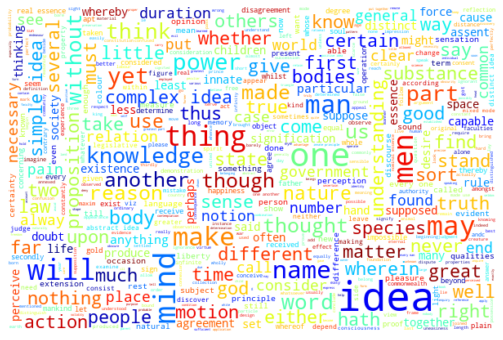

Author =  HUME :


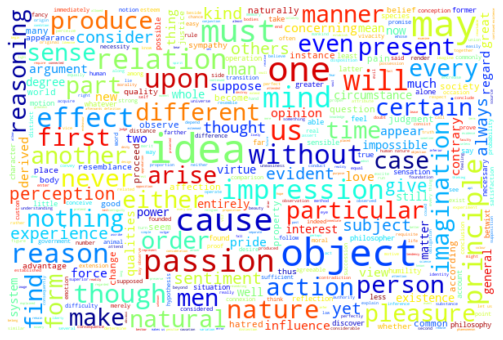

Author =  BERKELEY :


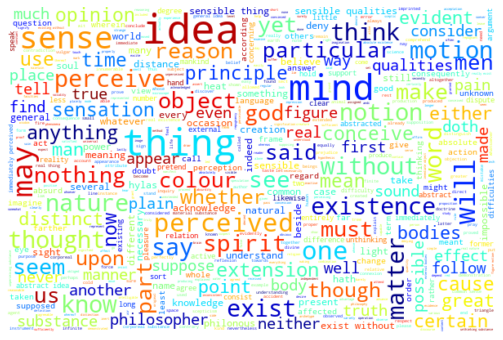

In [12]:
author = ["Locke","Hume","Berkeley"]  # empiricism

for author in author:
    df_temp = df[df.author == author]
    print("Author = ", author.upper(), ":")
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    wordcloud = WordCloud(stopwords = stop,
                         max_font_size = 50,
                         max_words = 500,
                         width = 600,
                         height = 400,
                         colormap = "jet",
                         background_color = "white").generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

We can see that for Locke, the main words are idea, mind, name, understanding, men, general, substance, nature, reason, knowledge, etc. For Hume, the main words are object, nature, reasoning, mind, passion, action, imagination, relation, manner, impression, effect, order, cause, etc. For Berkeley, the main words are perceived, spirit, sensation, extension, mind, sense, principle, etc. 

There are several words that are commonly used by the 3 authors, like idea, nature and mind. However most words they use are pretty different. Therefore, we cannot say that these 3  authors that come from the same school share a lot of similarity in terms of their language using.

Apart from authors from the same school, we can also explore the books that are written by the same author. Take Nietzsche as an example, he wrote 5 books in total from 1886-1888. Making wordcloud plot for each book can show us the high frequency words he uses in each book:

Title =  BEYOND GOOD AND EVIL :


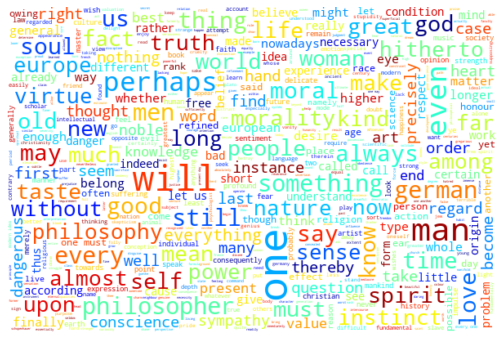

Title =  THUS SPAKE ZARATHUSTRA :


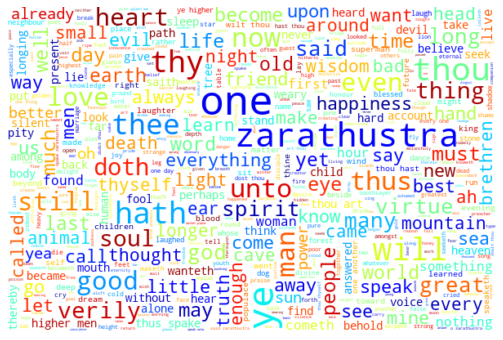

Title =  THE ANTICHRIST :


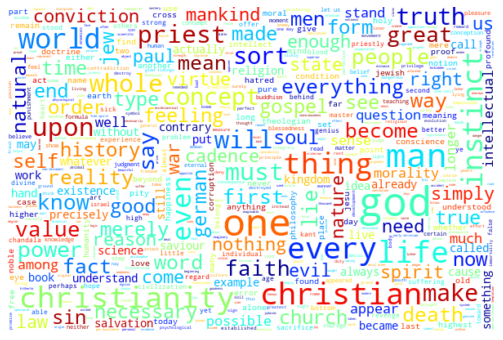

Title =  ECCE HOMO :


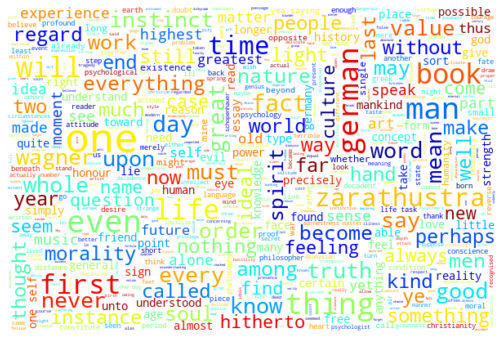

Title =  TWILIGHT OF THE IDOLS :


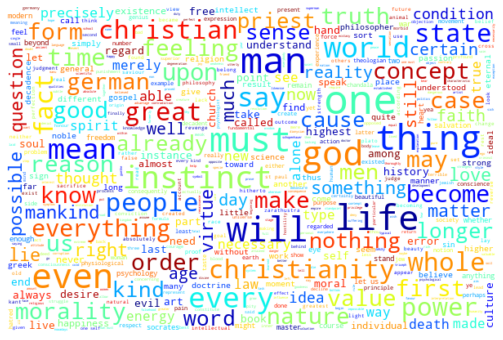

In [13]:
title = ["Beyond Good And Evil","Thus Spake Zarathustra","The Antichrist","Ecce Homo","Twilight Of The Idols"]

for title in title:
    df_temp = df[df.title == title]
    
    print('Title = ', title.upper(), ':')
    
    # render wordcloud
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    wordcloud = WordCloud(stopwords = stop, max_font_size = 50, max_words = 500,
                          width = 600, height = 400, colormap = "jet",
                          background_color="white").generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In the first book Beyond Good and Evil (1886), we can see the words he uses the most are german, soul, moral, hither, man, life, nature, europe, one, etc. 

In the second book Thus Speak Zarathustra (1887) the high frequency words are zarathustra, one, men, spirit, people, truth, etc. In this book there are not a lot of high frequency importent words.

In the third book The Antichrist (1888) the high frequency words are christianity, church, nature, god, world, life, instinct, feeling, reality, jew, concept, life etc.

In the fourth book Ecce Homo (1888) the high frequency words are german, zarathustra, wagner, man, people, life, culture, truth, whold, people, value, morality, etc.

In Twilight of the Idols (1888) the high frequency words are life, value, world, morality, christian, even, nature, german, value, christianity, virtue, energy, truth, instinct, etc.

We can see that althouth there are some commonly used words in these books like german, christian, morality and christian, the majority of the words using are still different. Especially for the 3 books published in the same year (1888), there is a big difference between the words he used. Therefore, it is very hard to say that for a particular writer, the words he uses are mostly the same.